<a href="https://www.kaggle.com/code/hsw1212/yolov8-object-detection-for-autonomous-vehicles?scriptVersionId=140062484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# YOLOv8 is part of ultralytics package
!pip install ultralytics  #The ultralytics package has the YOLO class

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.2 MB/s eta 0:00:00


In [2]:
# import libraries
import numpy as np
import pandas as pd
from ultralytics import YOLO
import cv2
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import os 
import pathlib 

In [3]:
# create model using pretrained yolov8
model = YOLO("yolov8m.pt") 

100%|██████████| 49.7M/49.7M [00:00<00:00, 143MB/s]


In [4]:
results=model.predict(source="/kaggle/input/3d-object-detection-for-autonomous-vehicles/test_images/host-a004_cam0_1231810077351067006.jpeg",save=True, conf=0.2,iou=0.5)
# conf: object confidence threshold for detection
#Iou: intersection over union threshold for Non Max Supression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
results
#as you can see below, Results object contains 5 components:
# boxes : they are object with properties for manipulating bounding boxes.
# masks : masks object indexing masks or getting segment coordinates
# keypoints : keypoint object for with properties and methods for manipulating predicted keypoints
# probs : pobs object for containing class probabilities
# orig_img : original image loaded in memory
# path :  path to the input image 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couc

In [6]:
result = results[0]

# finding the detailed result(Class, Coordinates, Prob)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [254, 545, 388, 615]
Probability: 0.9
---
Object type: car
Coordinates: [607, 538, 679, 594]
Probability: 0.87
---
Object type: car
Coordinates: [60, 538, 205, 586]
Probability: 0.86
---
Object type: car
Coordinates: [497, 531, 561, 580]
Probability: 0.85
---
Object type: car
Coordinates: [429, 539, 493, 578]
Probability: 0.84
---
Object type: car
Coordinates: [11, 794, 1215, 1013]
Probability: 0.67
---
Object type: stop sign
Coordinates: [86, 459, 130, 507]
Probability: 0.2
---
Object type: car
Coordinates: [251, 534, 317, 573]
Probability: 0.2
---
Object type: car
Coordinates: [253, 534, 312, 548]
Probability: 0.2
---


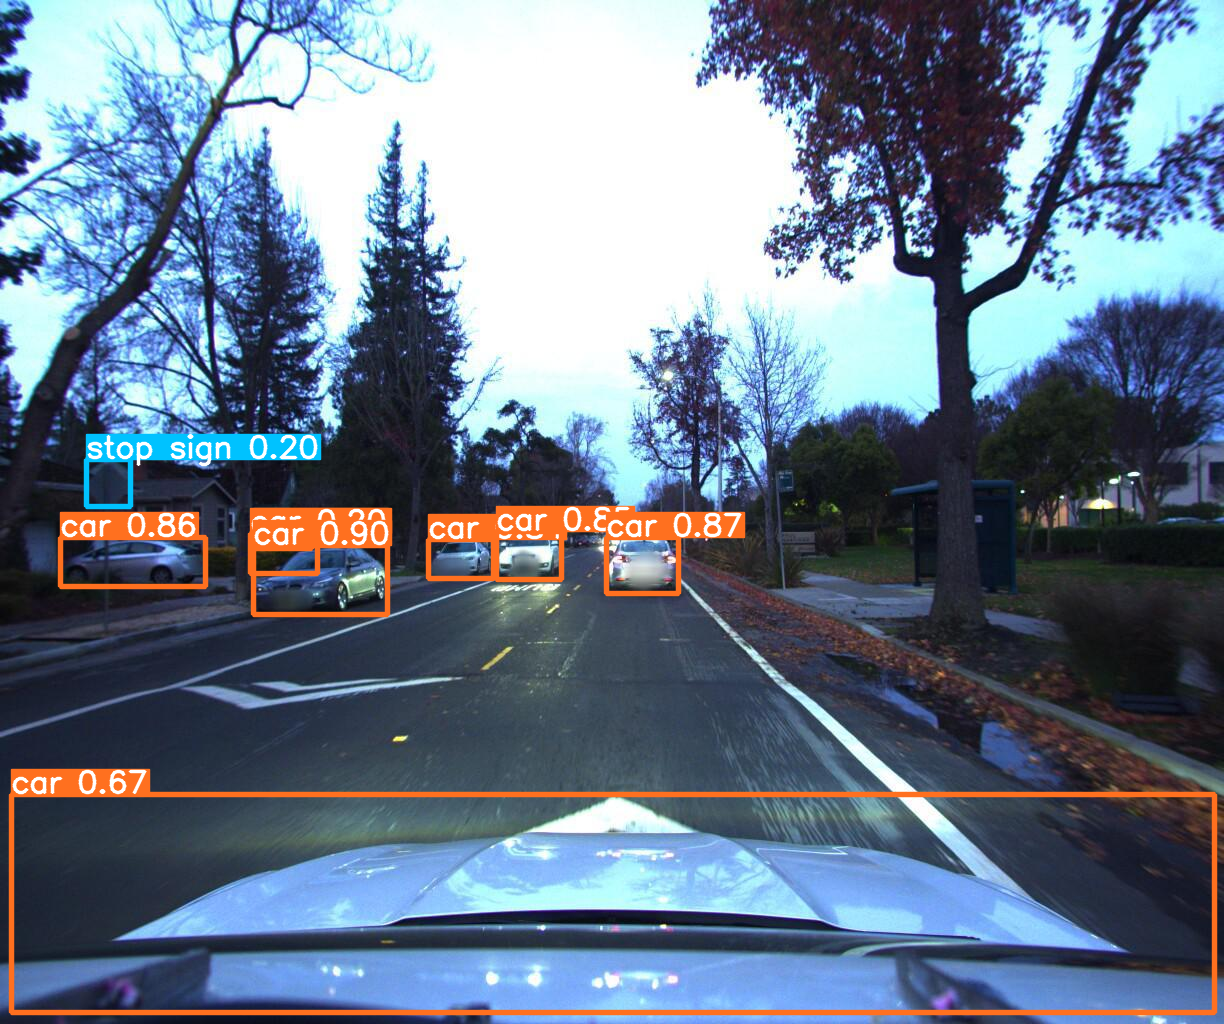

In [7]:
# Plotting results
res_plotted = results[0].plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)   #opencv uses BGR color format, while other image libraries (e.g. Image) uses RGB. So we need a conversion from BGR to RGB
display(Image.fromarray(res_plotted)) # .fromarray is used to create image from numpy array